In [16]:
import numpy as np
from torchvision import datasets, transforms
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_indices = np.random.choice(len(train_data), size=10000, replace=False)
test_indices = np.random.choice(len(test_data), size=2000, replace=False)

X_train = train_data.data[train_indices].numpy()
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = train_data.targets[train_indices].numpy()

X_test = test_data.data[test_indices].numpy()
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = test_data.targets[test_indices].numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.1MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 348kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.23MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 21.4MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [11]:
rf_model = RandomForestClassifier(n_estimators=20, max_depth=7, random_state=42)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")

Random Forest Accuracy: 0.805


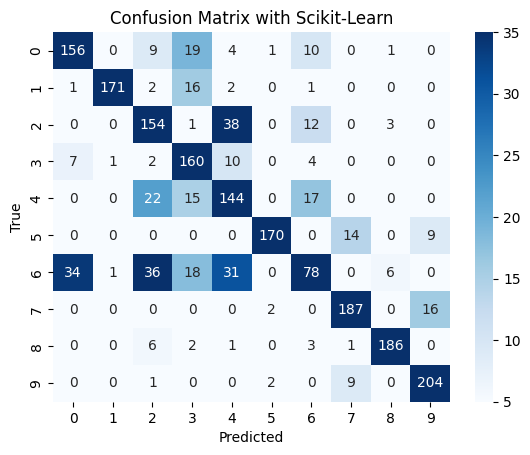

Precision (Weighted): 0.808
Recall (Weighted): 0.805
F1-Score (Weighted): 0.801


In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', vmin=5, vmax=35)

plt.title('Confusion Matrix with Scikit-Learn')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

precision_weighted = precision_score(y_test, rf_predictions, average='weighted')
recall_weighted = recall_score(y_test, rf_predictions, average='weighted')
f1_weighted = f1_score(y_test, rf_predictions, average='weighted')

print(f"Precision (Weighted): {precision_weighted:.3f}")
print(f"Recall (Weighted): {recall_weighted:.3f}")
print(f"F1-Score (Weighted): {f1_weighted:.3f}")
